In [6]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=510e79eaed19d145bf9daadfe588ef0f3d88e5f248dfc85418d4ae97f7444b3c
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

**Data Preprocessing Libraries**

In [7]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder, PowerTransformer,
    QuantileTransformer
)
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Splitting
from sklearn.model_selection import train_test_split


**Deep Learning Essential Libraries**

In [8]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [9]:
from googletrans import Translator
import pandas as pd

# Load dataset
df = pd.read_excel("/content/Datos Taller individual - 2410 (Estudiantes).csv.xlsx")

translator = Translator()

# Automatically translate all column names from Spanish → English
new_columns = {}
for col in df.columns:
    translation = translator.translate(col, src='es', dest='en')
    new_columns[col] = translation.text

df.rename(columns=new_columns, inplace=True)

print(df.columns)
print("\n All column names translated to English successfully!")


Index(['idloc', 'ageloc', 'mail', 'pages', 'phone', 'printed', 'service',
       'roster', 'imarket', 'tamamer', 'promo', 'women's clothing'],
      dtype='object')

 All column names translated to English successfully!


**Advanced Data Preprocessing**

In [10]:
df.head()

,idloc,ageloc,mail,pages,phone,printed,service,roster,imarket,tamamer,promo,women's clothing
0,1648,11,10042,68,35,22609.49,30,66307,8,Grande,2,43747.692274
1,1259,3,11909,107,42,24561.99,35,29107,8,Grande,2,37483.689991
2,674,13,10669,75,33,38914.22,52,9519,4,Median,3,57522.995483
3,1558,7,6981,65,19,39204.97,30,28651,7,Grande,1,50338.062084
4,1626,22,10940,74,37,23947.08,46,30654,7,Grande,2,45675.550054


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idloc             1600 non-null   int64  
 1   ageloc            1600 non-null   int64  
 2   mail              1600 non-null   int64  
 3   pages             1600 non-null   int64  
 4   phone             1600 non-null   int64  
 5   printed           1600 non-null   float64
 6   service           1600 non-null   int64  
 7   roster            1600 non-null   int64  
 8   imarket           1600 non-null   int64  
 9   tamamer           1600 non-null   object 
 10  promo             1600 non-null   int64  
 11  women's clothing  1600 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 150.1+ KB


In [12]:

# Descriptive statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idloc,1600.0,995.531875,577.536360,1.000000,495.750000,996.000000,1495.250000,1998.000000
ageloc,1600.0,10.469375,7.385588,1.000000,4.000000,9.000000,17.000000,25.000000
mail,1600.0,10598.675625,2400.668832,1147.000000,9644.250000,10480.000000,11763.500000,15259.000000
pages,1600.0,85.042500,15.935398,51.000000,74.000000,84.000000,98.000000,114.000000
phone,1600.0,37.637500,9.745792,17.000000,30.000000,36.000000,43.000000,59.000000
printed,1600.0,28834.617337,6251.170239,18061.200000,23562.317500,28734.790000,34022.992500,40027.780000
service,1600.0,43.651250,13.241524,15.000000,33.000000,43.000000,54.000000,68.000000
roster,1600.0,24104.131250,18217.352027,901.000000,10680.500000,18886.500000,31637.250000,135882.000000
imarket,1600.0,4.925000,2.606458,1.000000,3.000000,5.000000,7.000000,9.000000
promo,1600.0,1.976875,0.749461,1.000000,1.000000,2.000000,3.000000,3.000000


In [13]:
# Check unique values in categorical features
df.select_dtypes(include = "object").nunique()

,0
tamamer,3


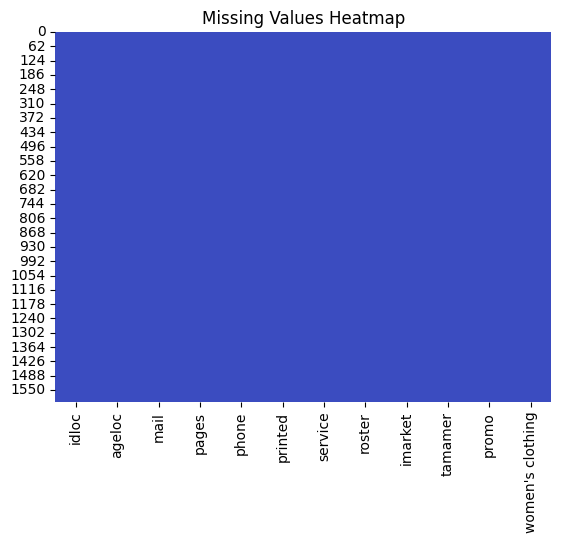

In [14]:
# Missing values heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

. **Outlier Detection and Treatment**

Outliers are extreme points that damage training.

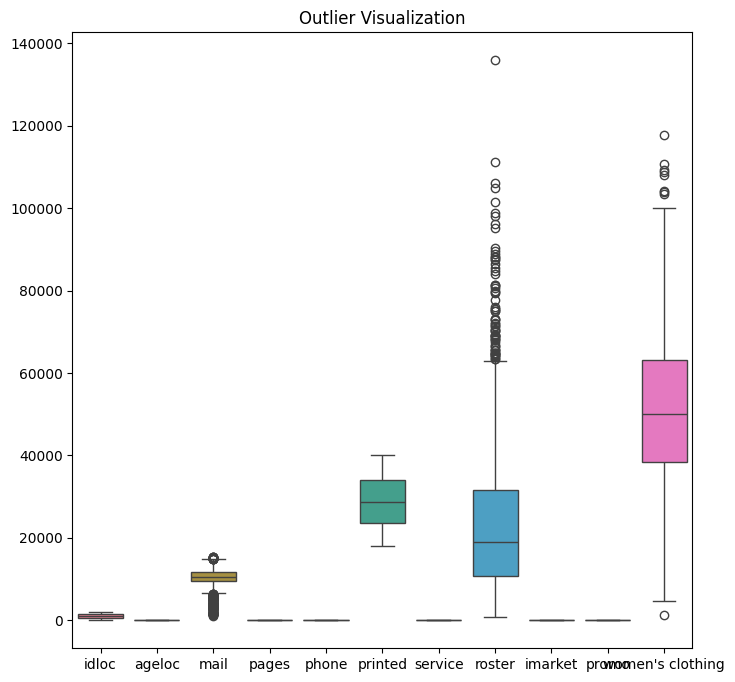

In [15]:
from sklearn.ensemble import IsolationForest

# Visual check
plt.figure(figsize = (8,8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Outlier Visualization")
plt.show()

**An (What outlier) is a data point that is significantly different from other data points in a dataset. It's an observation that lies an abnormal distance from other values. Outliers can occur due to measurement errors, data collection errors, or simply represent rare events.data analysis and machine learning, outliers can skew results and negatively impact the performance of models.**

In [16]:
# Isolation Forest for robust outlier detection
# The Isolation Forest algorithm works by randomly selecting a feature
# and then randomly selecting a split value between the minimum and maximum
# values of that selected feature. This process is repeated recursively to
# create "isolation trees".The idea is that outliers are easier to isolate than
# normal data points, requiring fewer random splits to be separated.
# We use Interquartile Range (IQR) and optionally IsolationForest (unsupervised anomaly detection).
iso = IsolationForest(contamination=0.02, random_state=42)
yhat = iso.fit_predict(df.select_dtypes(include=np.number))

# Remove outliers (where prediction = -1)
mask = yhat != -1
df = df[mask]

print("After outlier removal:", df.shape)

After outlier removal: (1568, 12)


**Encoding Categorical Variables**

'tamamer' column has categories 'Grande', 'Median', and 'Pequeño'. After applying pd.get_dummies, you'll have new columns like 'tamamer_Median' and 'tamamer_Pequeño' (because drop_first=True was used). If a row had 'tamamer' as 'Grande', both 'tamamer_Median' and 'tamamer_Pequeño' would be 0. If it was 'Median', 'tamamer_Median' would be 1 and 'tamamer_Pequeño' would be 0, and so on. This allows the model to use this categorical information in its calculations.



In [17]:
from sklearn.preprocessing import OneHotEncoder

# Create dummy variables
#pd.get_dummies is a function in the pandas library that is used for
#one-hot encoding categorical variables.
df = pd.get_dummies(df, columns=['tamamer'], drop_first=True)#drop_first=True avoids dummy variable trap (redundant columns)


**Feature Transformation**

**To handle skewed data (e.g., income, sales), we apply PowerTransformers or QuantileTransformer to make distributions more Gaussian.**

In [18]:
df.skew().sort_values(ascending = True)

,0
mail,-0.832742
pages,-0.036490
idloc,-0.004169
service,0.030503
promo,0.030931
printed,0.058045
imarket,0.063451
women's clothing,0.299716
phone,0.452623
ageloc,0.485649


In [19]:
# Apply Power Transformation
#PowerTransformer automatically stabilizes variance and makes data more normal-like — critical for linear models.
pt = PowerTransformer()
df[df.select_dtypes(include=np.number).columns] = pt.fit_transform(
    df.select_dtypes(include=np.number)
)

**Feature Scaling (Advanced Choices)**

**Different scaling techniques work best in different cases:**

**StandardScaler → normal distribution**

**RobustScaler → ignores outliers**

**MinMaxScaler → 0–1 range**

**We’ll use RobustScaler, best for real-world noisy data.**

In [20]:
scaler = RobustScaler()
df[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(
    df.select_dtypes(include=np.number)
)


**Feature Selection (Advanced)**

After cleaning, we reduce dimensionality using correlation analysis and mutual information.

In [21]:
# Drop highly correlated features
#This calculates the absolute value of the correlation matrix for all columns in the DataFrame df. The correlation matrix shows the linear relationship
# between pairs of columns. Taking the absolute value helps identify strong positive or negative correlations.

corr_matrix = df.corr().abs()
# This creates a mask to select only the upper triangle of the correlation matrix,
# excluding the diagonal (where a column is correlated with itself, which is always 1). This is done to avoid considering the same correlation twice (e.g., the correlation between 'A' and 'B' is the same as between 'B' and 'A').
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#This identifies columns that have a high correlation (greater than 0.85 in absolute value) with at least one other column in the upper triangle of the correlation matrix. These highly correlated features can be redundant and potentially cause issues in some machine learning models.
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df.drop(columns=to_drop, inplace=True)

# Mutual Information for selecting top 10 features
X = df.drop("women's clothing", axis=1)
y = df["women's clothing"]
#This calculates the mutual information between each feature in X and the target variable y. Mutual information measures the dependency between two variables. A higher mutual information score indicates a stronger relationship between the feature and the target variable. This is useful for feature selection as it helps identify which features are most informative for predicting the target.
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Top Important Features:\n", mi_series.head(10))


Top Important Features:
 service            0.176786
ageloc             0.153219
mail               0.091589
phone              0.088682
pages              0.084452
printed            0.079192
idloc              0.040835
tamamer_Median     0.024830
promo              0.018890
tamamer_Pequeño    0.016982
dtype: float64


**Save Preprocessed Dataset**

In [22]:
df.to_csv("cleaned_preprocessed_dataset.csv", index=False)
print("Advanced preprocessing completed & dataset saved!")


Advanced preprocessing completed & dataset saved!


In [23]:
df.shape

(1568, 13)

In [24]:
# CSV cleaned data
df = pd.read_csv("/content/cleaned_preprocessed_dataset.csv")

In [25]:
df.head()

,idloc,ageloc,mail,pages,phone,printed,service,roster,imarket,promo,women's clothing,tamamer_Median,tamamer_Pequeño
0,0.594563,0.155882,-0.205779,-0.668074,-0.085437,-0.616908,-0.636171,1.260708,0.689392,0.00000,-0.259995,False,False
1,0.250368,-0.668918,0.702885,0.956586,0.478896,-0.414034,-0.387109,0.423159,0.689392,0.00000,-0.533359,False,False
2,-0.334828,0.294331,0.087289,-0.375491,-0.261845,0.926973,0.421904,-0.605224,-0.255573,0.47112,0.302973,True,False
3,0.517235,-0.179797,-1.451851,-0.793623,-1.787402,0.952008,-0.636171,0.407784,0.470116,-0.52888,0.015135,False,False
4,0.575776,0.785159,0.217776,-0.417259,0.083708,-0.477256,0.142084,0.473757,0.470116,0.00000,-0.178293,False,False


In [26]:
print("First 5 rows of the cleaned data:")
display(df.head())

print("\nData types of the cleaned data:")
display(df.info())

First 5 rows of the cleaned data:


,idloc,ageloc,mail,pages,phone,printed,service,roster,imarket,promo,women's clothing,tamamer_Median,tamamer_Pequeño
0,0.594563,0.155882,-0.205779,-0.668074,-0.085437,-0.616908,-0.636171,1.260708,0.689392,0.00000,-0.259995,False,False
1,0.250368,-0.668918,0.702885,0.956586,0.478896,-0.414034,-0.387109,0.423159,0.689392,0.00000,-0.533359,False,False
2,-0.334828,0.294331,0.087289,-0.375491,-0.261845,0.926973,0.421904,-0.605224,-0.255573,0.47112,0.302973,True,False
3,0.517235,-0.179797,-1.451851,-0.793623,-1.787402,0.952008,-0.636171,0.407784,0.470116,-0.52888,0.015135,False,False
4,0.575776,0.785159,0.217776,-0.417259,0.083708,-0.477256,0.142084,0.473757,0.470116,0.00000,-0.178293,False,False



Data types of the cleaned data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idloc             1568 non-null   float64
 1   ageloc            1568 non-null   float64
 2   mail              1568 non-null   float64
 3   pages             1568 non-null   float64
 4   phone             1568 non-null   float64
 5   printed           1568 non-null   float64
 6   service           1568 non-null   float64
 7   roster            1568 non-null   float64
 8   imarket           1568 non-null   float64
 9   promo             1568 non-null   float64
 10  women's clothing  1568 non-null   float64
 11  tamamer_Median    1568 non-null   bool   
 12  tamamer_Pequeño   1568 non-null   bool   
dtypes: bool(2), float64(11)
memory usage: 137.9 KB


None

In [27]:
# Select boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert boolean columns to float (True becomes 1.0, False becomes 0.0)
df[bool_cols] = df[bool_cols].astype(float)

print("Data types after converting boolean columns to float:")
display(df.info())

print("\nFirst 5 rows after converting boolean columns to float:")
display(df.head())

Data types after converting boolean columns to float:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idloc             1568 non-null   float64
 1   ageloc            1568 non-null   float64
 2   mail              1568 non-null   float64
 3   pages             1568 non-null   float64
 4   phone             1568 non-null   float64
 5   printed           1568 non-null   float64
 6   service           1568 non-null   float64
 7   roster            1568 non-null   float64
 8   imarket           1568 non-null   float64
 9   promo             1568 non-null   float64
 10  women's clothing  1568 non-null   float64
 11  tamamer_Median    1568 non-null   float64
 12  tamamer_Pequeño   1568 non-null   float64
dtypes: float64(13)
memory usage: 159.4 KB


None


First 5 rows after converting boolean columns to float:


,idloc,ageloc,mail,pages,phone,printed,service,roster,imarket,promo,women's clothing,tamamer_Median,tamamer_Pequeño
0,0.594563,0.155882,-0.205779,-0.668074,-0.085437,-0.616908,-0.636171,1.260708,0.689392,0.00000,-0.259995,0.0,0.0
1,0.250368,-0.668918,0.702885,0.956586,0.478896,-0.414034,-0.387109,0.423159,0.689392,0.00000,-0.533359,0.0,0.0
2,-0.334828,0.294331,0.087289,-0.375491,-0.261845,0.926973,0.421904,-0.605224,-0.255573,0.47112,0.302973,1.0,0.0
3,0.517235,-0.179797,-1.451851,-0.793623,-1.787402,0.952008,-0.636171,0.407784,0.470116,-0.52888,0.015135,0.0,0.0
4,0.575776,0.785159,0.217776,-0.417259,0.083708,-0.477256,0.142084,0.473757,0.470116,0.00000,-0.178293,0.0,0.0


In [28]:
X = df.drop("women's clothing", axis=1)
y = df["women's clothing"]

**Train-Test Split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [30]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)

X_train shape (1254, 12)
X_test shape (314, 12)


In [31]:
from tensorflow.keras import regularizers

def build_more_complex_nn(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),

        # Layer 1
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Layer 2
        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Layer 3
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Output layer for regression
        layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), # Slightly reduced learning rate
                  loss='mse',
                  metrics=['mae'])
    return model

In [33]:
model = build_more_complex_nn(X_train.shape[1])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 45,441 (177.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [34]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
checkpoint = callbacks.ModelCheckpoint('best_linear_regression_nn.keras',
                                       monitor='val_loss', save_best_only=True)

In [35]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=300,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr, checkpoint],
                    verbose=1)


Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 3.2824 - mae: 1.3453 - val_loss: 0.6596 - val_mae: 0.4940 - learning_rate: 5.0000e-04
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3480 - mae: 1.1364 - val_loss: 0.6499 - val_mae: 0.4872 - learning_rate: 5.0000e-04
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0487 - mae: 1.0655 - val_loss: 0.6719 - val_mae: 0.5017 - learning_rate: 5.0000e-04
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7678 - mae: 0.9730 - val_loss: 0.6484 - val_mae: 0.4845 - learning_rate: 5.0000e-04
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5354 - mae: 0.8872 - val_loss: 0.6176 - val_mae: 0.4611 - learning_rate: 5.0000e-04
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4441 - mae: 0.8459 - val_loss: 0.6182 - val_mae: 0.4623 - learning_rate: 5.0000e-04
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3022 - mae: 0.7936 - val_loss: 0.5759 - val_mae: 0.4287 - learning_r

**Training Visualization (Loss & MAE)**

Text(0.5, 1.0, 'MSE Loss Curve')

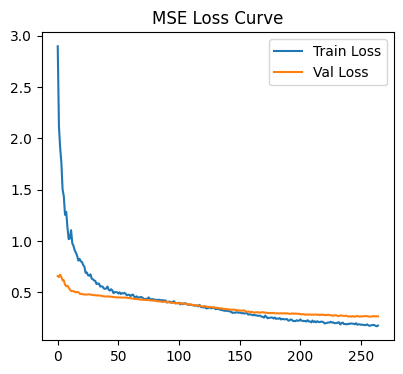

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('MSE Loss Curve')


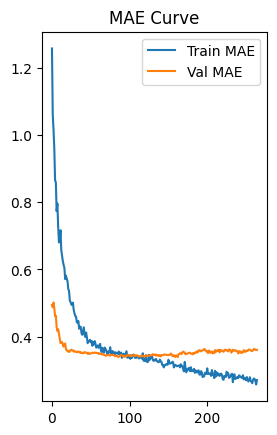

In [37]:
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend(); plt.title('MAE Curve')
plt.show()

**Evaluate Model on Test Data**

In [39]:
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R² Score: 0.5760
RMSE: 0.4638
MAE: 0.3686


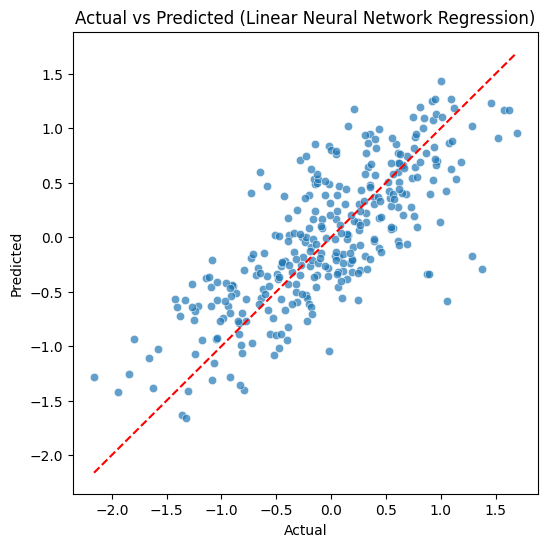

In [41]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Linear Neural Network Regression)')
plt.show()


**Residual Analysis (Advanced Diagnostic)**

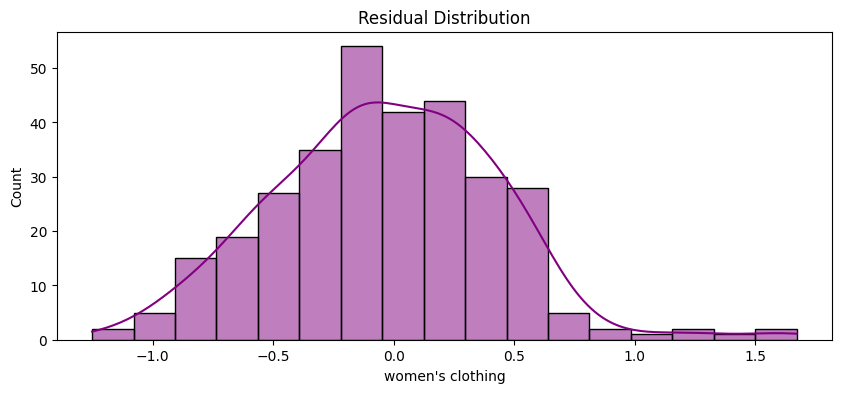

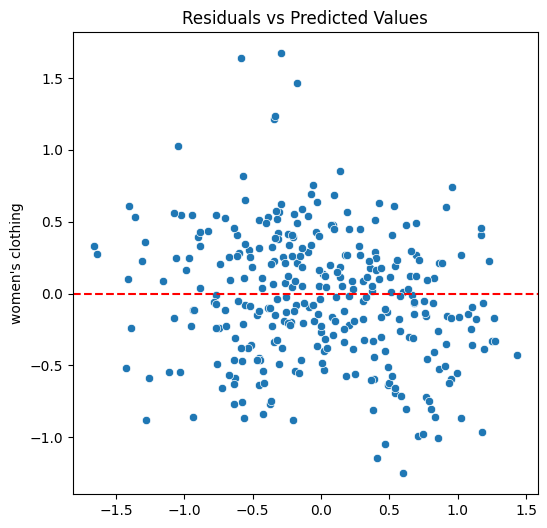

In [42]:
residuals = y_test - y_pred
plt.figure(figsize=(10,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.show()


**Model Explainability**

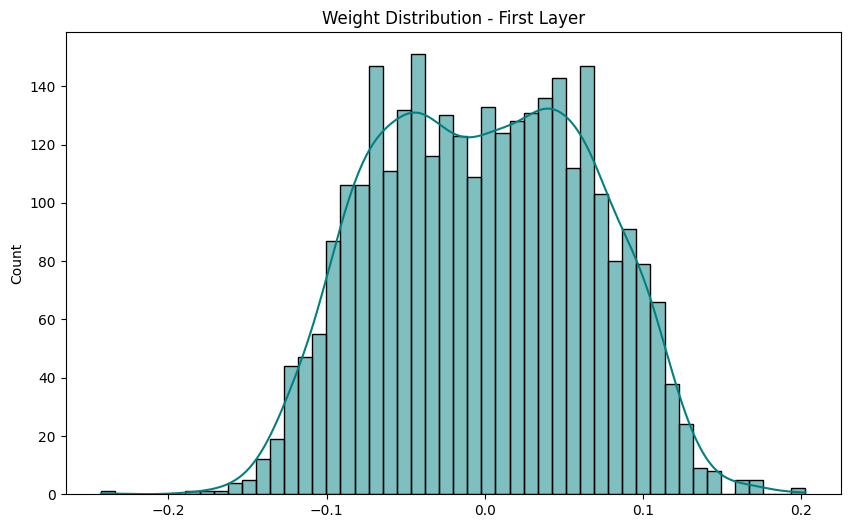

In [43]:
#linear Neural Networks let you extract learned weights (like coefficients in linear regression).
#This helps detect which input features are strongly weighted.
weights, biases = model.layers[0].get_weights()
plt.figure(figsize=(10,6))
sns.histplot(weights.flatten(), bins=50, kde=True, color='teal')
plt.title("Weight Distribution - First Layer")
plt.show()


**Hyperparameter Tuning**

You can use KerasTuner for automated search of hidden units, learning rate, etc.

In [44]:
!pip install keras-tuner

import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(hp.Int('units1', min_value=64, max_value=512, step=64),
                           activation='linear'))
    model.add(layers.Dense(hp.Int('units2', min_value=32, max_value=256, step=32),
                           activation='linear'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae'])
    return model

tuner = kt.RandomSearch(model_builder,
                        objective='val_loss',
                        max_trials=5,
                        directory='tuner_dir',
                        project_name='linear_nn_regression')

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, LR: {best_hps.get('learning_rate')}")


Trial 5 Complete [00h 00m 12s]
val_loss: 0.19896528124809265

Best val_loss So Far: 0.1948949247598648
Total elapsed time: 00h 01m 02s
Best units1: 448, LR: 0.001


**Model Saving & Reuse**

In [45]:
model.save('linear_regression_nn_final.keras')
# later load:
model = keras.models.load_model('linear_regression_nn_final.keras')


**Auto-Learning Visualization**

In [51]:
import tensorflow.keras.backend as K # Import Keras backend for lower-level operations

class LRFinder(keras.callbacks.Callback): # Define a custom callback class for learning rate finding
    def __init__(self, min_lr=1e-6, max_lr=1, steps=100): # Constructor to initialize learning rate range and steps
        self.min_lr, self.max_lr, self.steps = min_lr, max_lr, steps # Store min/max learning rates and steps
        self.lrs, self.losses = [], [] # Initialize lists to store learning rates and losses

    def on_train_batch_end(self, batch, logs=None): # Method called at the end of each training batch
        # Calculate learning rate using exponential growth
        lr = self.min_lr * (self.max_lr / self.min_lr) ** (batch / self.steps)
        # Access and set the learning rate using .learning_rate for newer Keras versions
        self.model.optimizer.learning_rate.assign(lr)
        self.lrs.append(lr) # Append the current learning rate to the list
        self.losses.append(logs['loss']) # Append the current batch loss to the list

    def on_train_end(self, logs=None): # Method called at the end of training
        plt.figure(figsize=(10, 6)) # Create a new figure for the plot
        plt.plot(self.lrs, self.losses) # Plot learning rates vs losses
        plt.xscale('log') # Set x-axis to logarithmic scale
        plt.title("Learning Rate Finder") # Set the plot title
        plt.xlabel("Learning Rate") # Set the x-axis label
        plt.ylabel("Loss") # Set the y-axis label
        plt.grid(True, which="both", linestyle='--') # Add a grid to the plot
        plt.show() # Display the plot


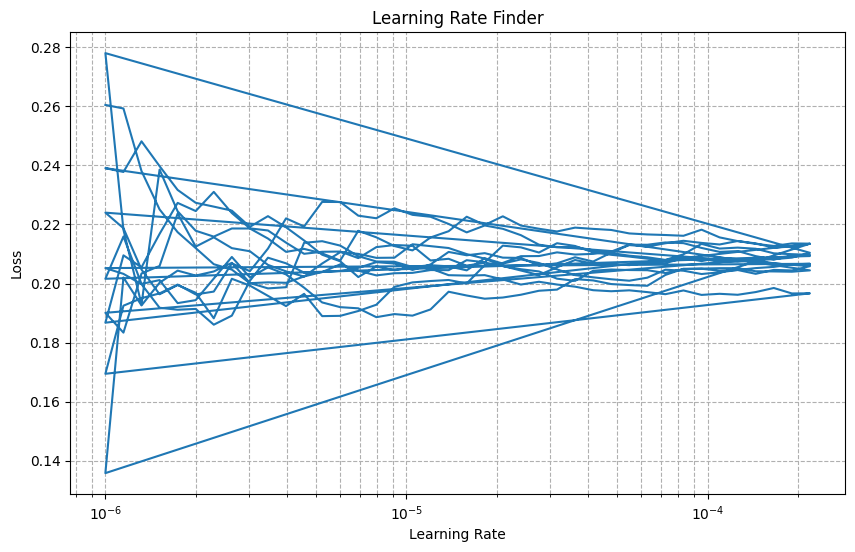

In [50]:
# Instantiate the LRFinder
lr_finder = LRFinder()

# Train the model with the LRFinder callback
# We train for a few epochs to see the learning rate vs loss plot
history = model.fit(X_train, y_train, epochs=10, callbacks=[lr_finder], verbose=0)

# The LRFinder will automatically plot the learning rate vs loss after training